In [294]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [295]:
df=  pd.read_csv('C:\\Users\\amvi\\Downloads\\Health+Care+Project\\Data.csv')

# no of ciggarates per day,alcohol consumpstion per day,we should also analyse in his or her occuption is it mostly sedentary or active,liver enzymes

In [296]:
df.head(10)

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616
5,5005,8,0,0,Salried,2,225 to 250,5306,39,0,...,Unknown,2003.0,Bhubaneswar,78,Y,Rare,No,3,13,39488
6,5006,8,0,0,Student,4,125 to 150,4676,40,0,...,never smoked,2004.0,Guwahati,81,N,No,Moderate,3,16,37020
7,5007,1,0,0,Student,4,150 to 175,7448,46,0,...,smokes,NaN,Chennai,72,N,Rare,Moderate,0,34,29616
8,5008,8,1,0,Salried,4,125 to 150,5632,45,0,...,smokes,2007.0,Mumbai,67,Y,Rare,No,1,12,22212
9,5009,4,3,0,Salried,3,125 to 150,4130,38,0,...,formerly smoked,NaN,Nagpur,63,N,Daily,Moderate,0,12,8638


In [290]:
df.tail(10)

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
24990,29990,3,0,0,Salried,3,225 to 250,4329,22,0,...,Unknown,NaN,Guwahati,81,Y,Daily,Moderate,3,31,41956
24991,29991,4,0,0,Business,4,150 to 175,3924,60,1,...,smokes,2000.0,Mangalore,80,Y,No,Moderate,0,36,45658
24992,29992,3,0,0,Student,2,150 to 175,4565,17,0,...,never smoked,2002.0,Nagpur,73,N,Rare,Moderate,2,20,28382
24993,29993,5,0,0,Business,2,175 to 200,4789,35,0,...,smokes,1994.0,Guwahati,79,N,No,Moderate,1,29,32084
24994,29994,7,0,0,Business,3,150 to 175,5494,43,0,...,Unknown,2013.0,Mumbai,61,N,Rare,Moderate,5,36,13574
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,...,smokes,2000.0,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,...,never smoked,2009.0,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,...,Unknown,NaN,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,...,Unknown,NaN,Surat,74,N,Rare,Moderate,0,40,30850
24999,29999,8,2,0,Business,4,150 to 175,5882,22,1,...,formerly smoked,2014.0,Chennai,57,N,No,No,4,21,6170


In [291]:
df.shape

(25000, 24)

In [140]:
df.dtypes

applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Year_last_admitted                float64
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                    

In [141]:
pd.value_counts(df.dtypes)

int64      14
object      8
float64     2
dtype: int64

In [142]:
df.drop("applicant_id", axis=1, inplace=True)

In [143]:
df.drop("Location", axis=1, inplace=True)

In [144]:
df.head(10)

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,Year_last_admitted,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,Salried,2,125 to 150,4866,28,1,0,...,31.2,Unknown,NaN,67,N,Rare,Moderate,1,25,20978
1,0,0,0,Student,4,150 to 175,6411,50,0,0,...,34.2,formerly smoked,NaN,58,N,Rare,Moderate,3,27,6170
2,1,0,0,Business,4,200 to 225,4509,68,0,0,...,40.4,formerly smoked,NaN,73,N,Daily,Extreme,0,32,28382
3,7,4,0,Business,2,175 to 200,6214,51,0,0,...,22.9,Unknown,NaN,71,Y,Rare,No,3,37,27148
4,3,1,0,Student,2,150 to 175,4938,44,0,1,...,26.5,never smoked,2004.0,74,N,No,Extreme,0,34,29616
5,8,0,0,Salried,2,225 to 250,5306,39,0,0,...,38.0,Unknown,2003.0,78,Y,Rare,No,3,13,39488
6,8,0,0,Student,4,125 to 150,4676,40,0,0,...,28.7,never smoked,2004.0,81,N,No,Moderate,3,16,37020
7,1,0,0,Student,4,150 to 175,7448,46,0,0,...,26.0,smokes,NaN,72,N,Rare,Moderate,0,34,29616
8,8,1,0,Salried,4,125 to 150,5632,45,0,0,...,24.4,smokes,2007.0,67,Y,Rare,No,1,12,22212
9,4,3,0,Salried,3,125 to 150,4130,38,0,0,...,46.0,formerly smoked,NaN,63,N,Daily,Moderate,0,12,8638


In [145]:
df.shape

(25000, 22)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

In [147]:
pd.value_counts(df.dtypes)

int64      13
object      7
float64     2
dtype: int64

In [148]:
df.select_dtypes(exclude="number").head()

,Occupation,cholesterol_level,Gender,smoking_status,covered_by_any_other_company,Alcohol,exercise
0,Salried,125 to 150,Male,Unknown,N,Rare,Moderate
1,Student,150 to 175,Male,formerly smoked,N,Rare,Moderate
2,Business,200 to 225,Female,formerly smoked,N,Daily,Extreme
3,Business,175 to 200,Female,Unknown,Y,Rare,No
4,Student,150 to 175,Male,never smoked,N,No,Extreme


In [149]:
 # Converting adventure_sports,other_major_decs_history and  heart_decs_history into Category 
df["adventure_sports"]= pd.Categorical(df['adventure_sports'])
df["other_major_decs_history"]= pd.Categorical(df['other_major_decs_history'])
df["heart_decs_history"]= pd.Categorical(df['heart_decs_history'])


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   years_of_insurance_with_us      25000 non-null  int64   
 1   regular_checkup_lasy_year       25000 non-null  int64   
 2   adventure_sports                25000 non-null  category
 3   Occupation                      25000 non-null  object  
 4   visited_doctor_last_1_year      25000 non-null  int64   
 5   cholesterol_level               25000 non-null  object  
 6   daily_avg_steps                 25000 non-null  int64   
 7   age                             25000 non-null  int64   
 8   heart_decs_history              25000 non-null  category
 9   other_major_decs_history        25000 non-null  category
 10  Gender                          25000 non-null  object  
 11  avg_glucose_level               25000 non-null  int64   
 12  bmi               

In [328]:
for column in df[['adventure_sports','Occupation','cholesterol_level','heart_decs_history','other_major_decs_history',"Gender",'smoking_status','covered_by_any_other_company','Alcohol','exercise',]]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

ADVENTURE_SPORTS :  2
1     2043
0    22957
Name: adventure_sports, dtype: int64


OCCUPATION :  3
1     4811
0    10020
2    10169
Name: Occupation, dtype: int64


CHOLESTEROL_LEVEL :  5
4    2054
2    2881
3    2963
0    8339
1    8763
Name: cholesterol_level, dtype: int64


HEART_DECS_HISTORY :  2
1     1366
0    23634
Name: heart_decs_history, dtype: int64


OTHER_MAJOR_DECS_HISTORY :  2
1     2454
0    22546
Name: other_major_decs_history, dtype: int64


GENDER :  2
0     8578
1    16422
Name: Gender, dtype: int64


SMOKING_STATUS :  4
3    3867
1    4329
0    7555
2    9249
Name: smoking_status, dtype: int64


COVERED_BY_ANY_OTHER_COMPANY :  2
1     7582
0    17418
Name: covered_by_any_other_company, dtype: int64


ALCOHOL :  3
0     2707
1     8541
2    13752
Name: Alcohol, dtype: int64


EXERCISE :  3
2     5114
0     5248
1    14638
Name: exercise, dtype: int64




In [152]:
df[['years_of_insurance_with_us','regular_checkup_lasy_year','visited_doctor_last_1_year','daily_avg_steps', 'age','avg_glucose_level','bmi','Year_last_admitted','weight','weight_change_in_last_one_year','fat_percentage','insurance_cost']].nunique()

years_of_insurance_with_us           9
regular_checkup_lasy_year            6
visited_doctor_last_1_year          12
daily_avg_steps                   4914
age                                 59
avg_glucose_level                  221
bmi                                465
Year_last_admitted                  29
weight                              45
weight_change_in_last_one_year       7
fat_percentage                      32
insurance_cost                      54
dtype: int64

In [153]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,Year_last_admitted,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost


In [154]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

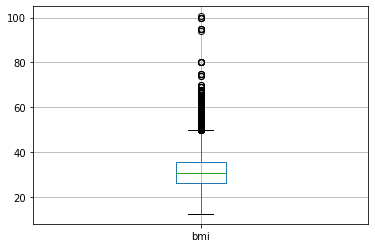

In [155]:
df.boxplot(column=['bmi'])
plt.show()

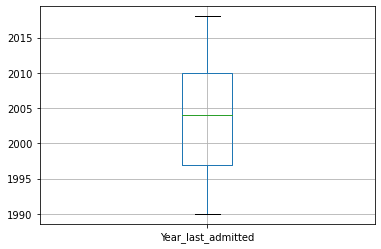

In [156]:
df.boxplot(column=['Year_last_admitted'])
plt.show()

In [157]:
median=df["bmi"].median()
df["bmi"].replace(np.nan,median,inplace=True)

In [158]:
mean=df["Year_last_admitted"].mean()
df["Year_last_admitted"].replace(np.nan,mean,inplace=True)

In [159]:
# Check for missing value in any column
df.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [160]:
#Year_last_admitted ould be dropped as it contains 40%  of missing value and keeping it in the dataset increases the noise.
df.drop("Year_last_admitted", axis=1, inplace=True)

In [161]:
df.describe()

,years_of_insurance_with_us,regular_checkup_lasy_year,visited_doctor_last_1_year,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,5215.889320,44.918320,167.530000,31.357952,71.610480,2.517960,28.812280,27147.407680
std,2.606612,1.199449,1.141663,1053.179748,16.107492,62.729712,7.720963,9.325183,1.690335,8.632382,14323.691832
min,0.000000,0.000000,0.000000,2034.000000,16.000000,57.000000,12.300000,52.000000,0.000000,11.000000,2468.000000
25%,2.000000,0.000000,2.000000,4543.000000,31.000000,113.000000,26.300000,64.000000,1.000000,21.000000,16042.000000
50%,4.000000,0.000000,3.000000,5089.000000,45.000000,168.000000,30.500000,72.000000,3.000000,31.000000,27148.000000
75%,6.000000,1.000000,4.000000,5730.000000,59.000000,222.000000,35.300000,78.000000,4.000000,36.000000,37020.000000
max,8.000000,5.000000,12.000000,11255.000000,74.000000,277.000000,100.600000,96.000000,6.000000,42.000000,67870.000000


In [162]:
df.describe(include='object').T

,count,unique,top,freq
Occupation,25000,3,Student,10169
cholesterol_level,25000,5,150 to 175,8763
Gender,25000,2,Male,16422
smoking_status,25000,4,never smoked,9249
covered_by_any_other_company,25000,2,N,17418
Alcohol,25000,3,Rare,13752
exercise,25000,3,Moderate,14638


In [163]:
df.describe(include='category').T

,count,unique,top,freq
adventure_sports,25000,2,0,22957
heart_decs_history,25000,2,0,23634
other_major_decs_history,25000,2,0,22546


In [164]:
df.skew()

years_of_insurance_with_us       -0.075217
regular_checkup_lasy_year         1.610907
adventure_sports                  3.054017
visited_doctor_last_1_year        0.978456
daily_avg_steps                   0.908867
age                               0.013860
heart_decs_history                3.919343
other_major_decs_history          2.701327
avg_glucose_level                -0.006389
bmi                               1.090847
weight                            0.109077
weight_change_in_last_one_year    0.068026
fat_percentage                   -0.363262
insurance_cost                    0.331650
dtype: float64

UNIVARIATE ANALYSIS-

In [165]:
#CHECKING FOR OUTLIERS

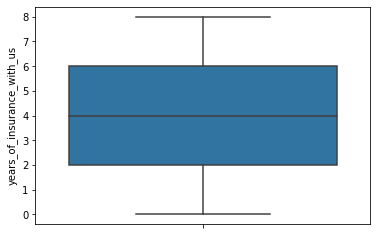

In [166]:
sns.boxplot(y=df["years_of_insurance_with_us"])

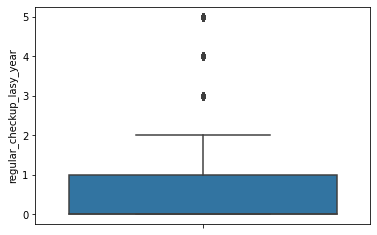

In [167]:
sns.boxplot(y=df["regular_checkup_lasy_year"])

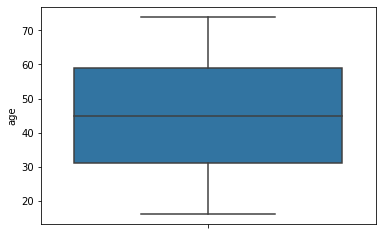

In [168]:
sns.boxplot(y=df["age"])

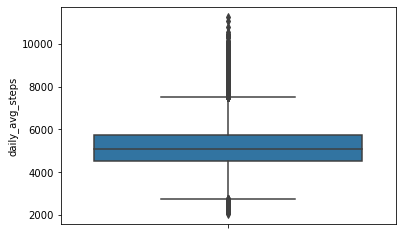

In [169]:
sns.boxplot(y=df["daily_avg_steps"])

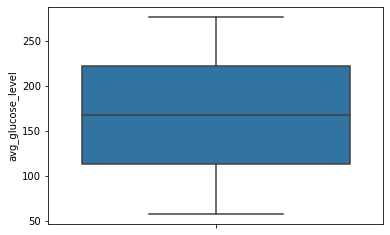

In [170]:
sns.boxplot(y=df["avg_glucose_level"])

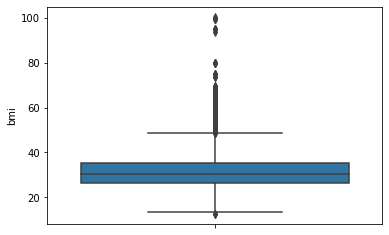

In [171]:
sns.boxplot(y=df["bmi"])

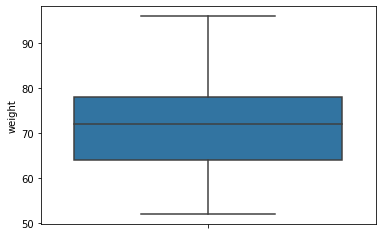

In [172]:
sns.boxplot(y=df["weight"])

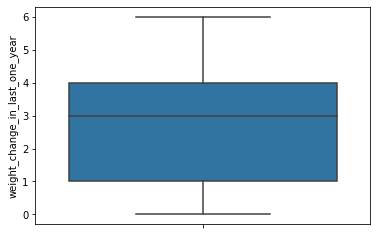

In [173]:
sns.boxplot(y=df["weight_change_in_last_one_year"])

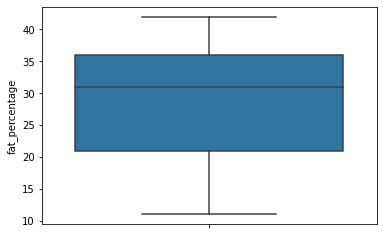

In [174]:
sns.boxplot(y=df["fat_percentage"])

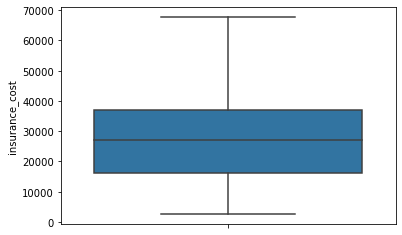

In [175]:
sns.boxplot(y=df["insurance_cost"])

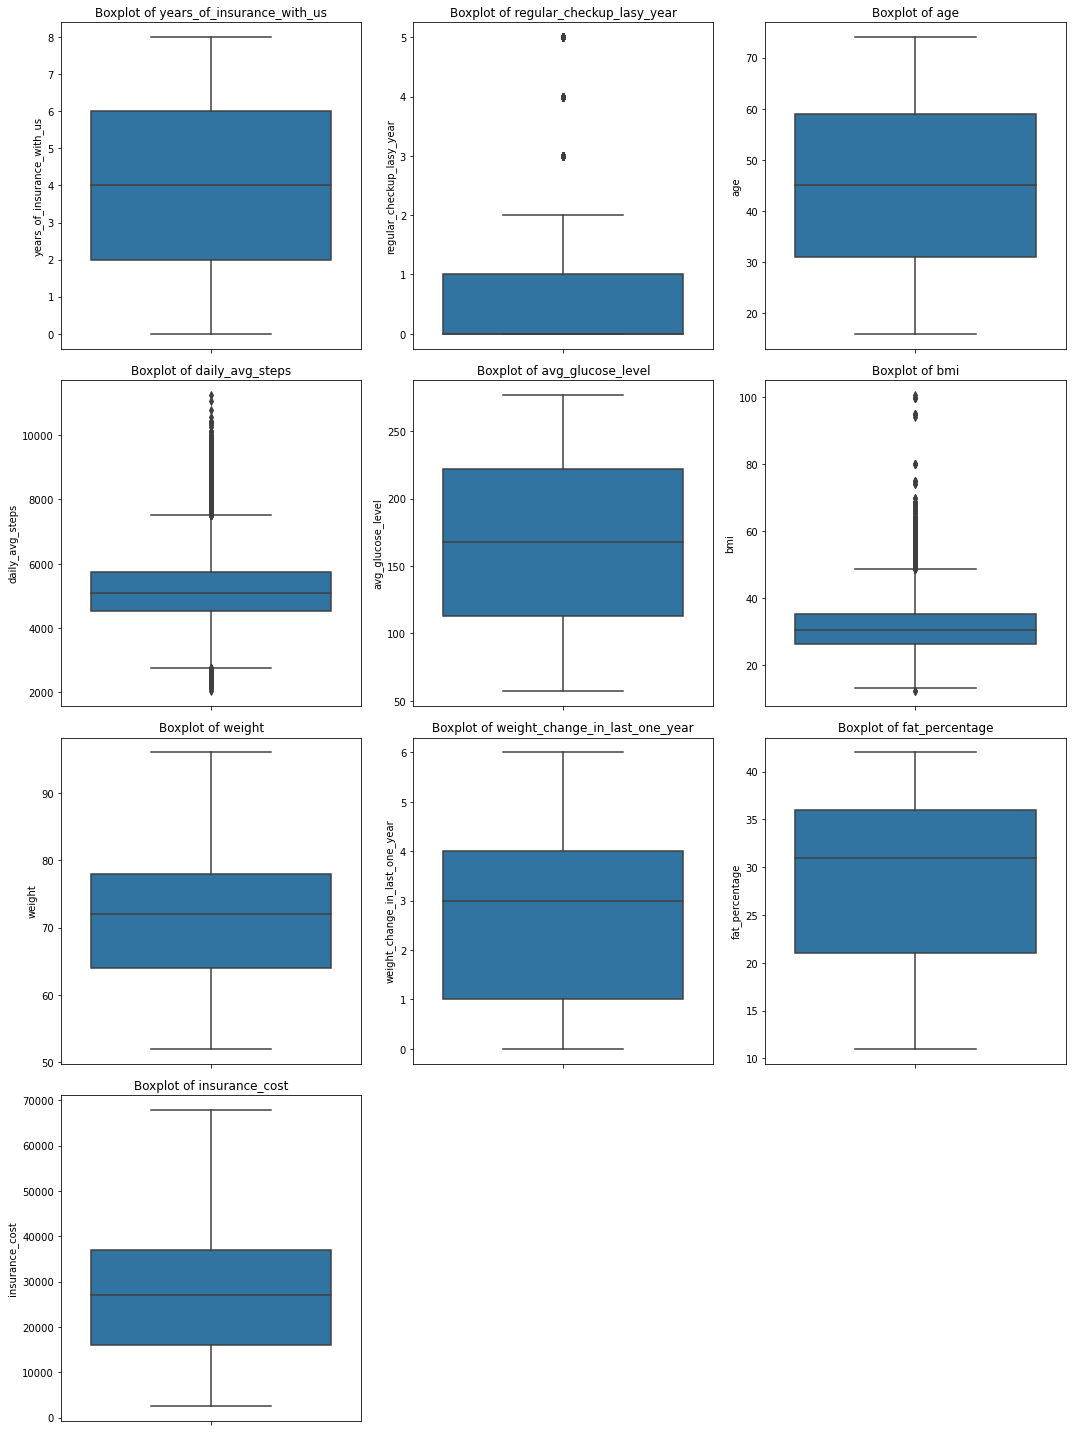

In [176]:
data_plot=df[['years_of_insurance_with_us','regular_checkup_lasy_year', 'age', 'daily_avg_steps','avg_glucose_level','bmi','weight','weight_change_in_last_one_year','fat_percentage','insurance_cost']]
fig=plt.figure(figsize=(15,20))
feature_list = data_plot.columns
for i in range(0,len(data_plot.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]]);
    plt.title('Boxplot of {}'.format(feature_list[i]));
    plt.tight_layout()

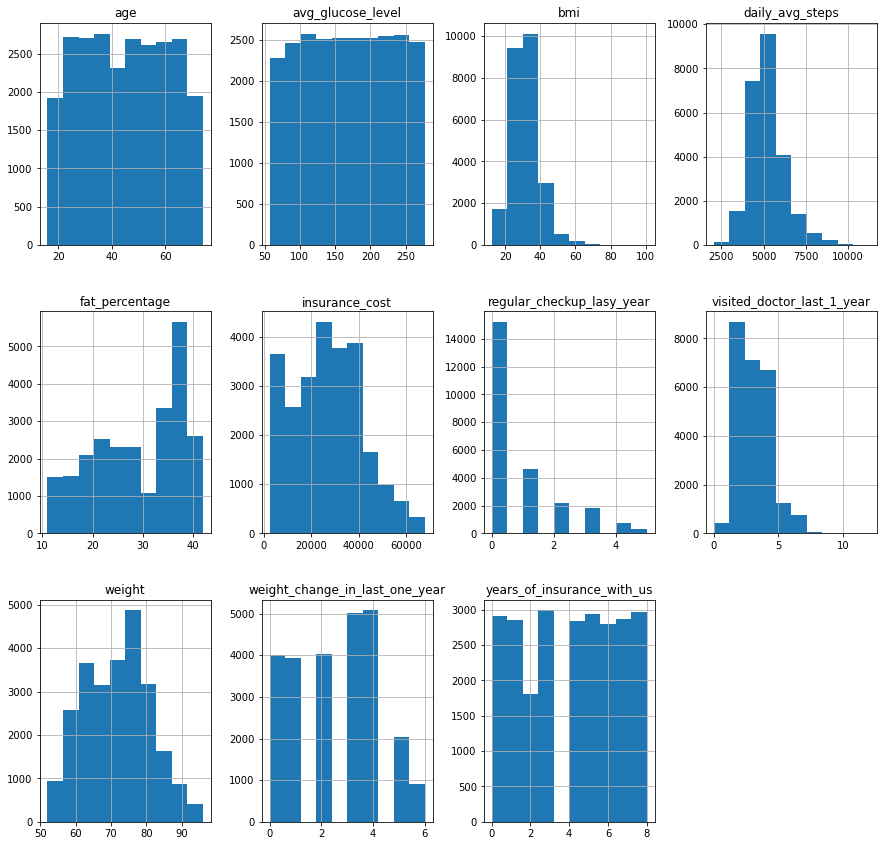

In [177]:
df.hist(figsize=(15,20),layout=(4,4));

In [178]:
df1=df

In [179]:
df1.head(5)

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,avg_glucose_level,bmi,smoking_status,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,Salried,2,125 to 150,4866,28,1,0,...,97,31.2,Unknown,67,N,Rare,Moderate,1,25,20978
1,0,0,0,Student,4,150 to 175,6411,50,0,0,...,212,34.2,formerly smoked,58,N,Rare,Moderate,3,27,6170
2,1,0,0,Business,4,200 to 225,4509,68,0,0,...,166,40.4,formerly smoked,73,N,Daily,Extreme,0,32,28382
3,7,4,0,Business,2,175 to 200,6214,51,0,0,...,109,22.9,Unknown,71,Y,Rare,No,3,37,27148
4,3,1,0,Student,2,150 to 175,4938,44,0,1,...,118,26.5,never smoked,74,N,No,Extreme,0,34,29616


In [180]:
#lets treat the outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
#could have given visceral fat percentage instead of BMI

In [181]:
lrincome,urincome=remove_outlier(df1['regular_checkup_lasy_year'])
df1['regular_checkup_lasy_year']=np.where(df1['regular_checkup_lasy_year']>urincome,urincome,df1['regular_checkup_lasy_year'])
df1['regular_checkup_lasy_year']=np.where(df1['regular_checkup_lasy_year']<lrincome,lrincome,df1['regular_checkup_lasy_year'])


lrincome,urincome=remove_outlier(df1['daily_avg_steps'])
df1['daily_avg_steps']=np.where(df1['daily_avg_steps']>urincome,urincome,df1['daily_avg_steps'])
df1['daily_avg_steps']=np.where(df1['daily_avg_steps']<lrincome,lrincome,df1['daily_avg_steps'])

lrincome,urincome=remove_outlier(df1['bmi'])
df1['bmi']=np.where(df1['bmi']>urincome,urincome,df1['bmi'])
df1['bmi']=np.where(df1['bmi']<lrincome,lrincome,df1['bmi'])





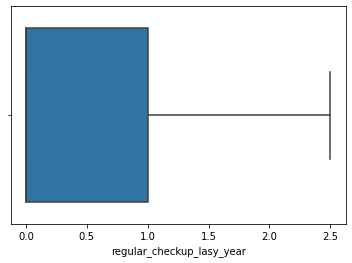

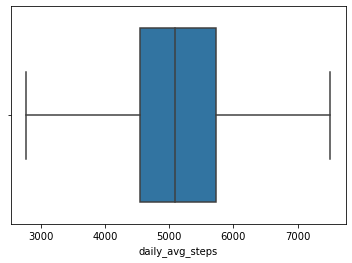

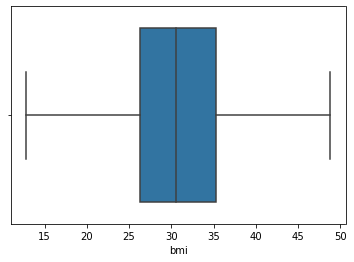

In [182]:
cols = ['regular_checkup_lasy_year' ,'daily_avg_steps', 'bmi']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

Text(0.5, 0, 'insurance_cost ')

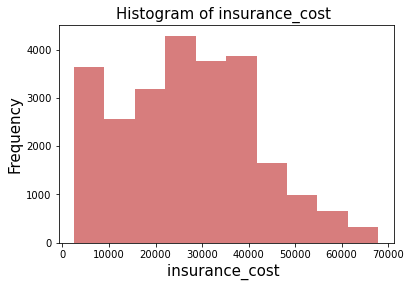

In [183]:
%matplotlib inline
plt.figure()
plt.hist(x = "insurance_cost", data = df, color = "indianred", alpha = 0.8)
plt.title("Histogram of insurance_cost ", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("insurance_cost ", fontsize = 15)

In [184]:
df ['insurance_cost'].skew()

0.3316500625115993

In [185]:
df.insurance_cost.describe()

count    25000.000000
mean     27147.407680
std      14323.691832
min       2468.000000
25%      16042.000000
50%      27148.000000
75%      37020.000000
max      67870.000000
Name: insurance_cost, dtype: float64

Lets Bin the age  as per average age  of the candidates

Youth (15-24 years) 
Adults (25-64 years) 
Elderly (65 years and over) 



Text(0.5, 1.0, 'weight VS insurance_cost')

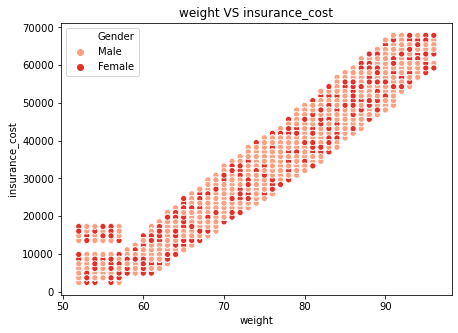

In [186]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='weight',y='insurance_cost',hue='Gender',data=df,palette='Reds')
plt.title('weight VS insurance_cost')

Text(0.5, 1.0, 'weight VS insurance_cost')

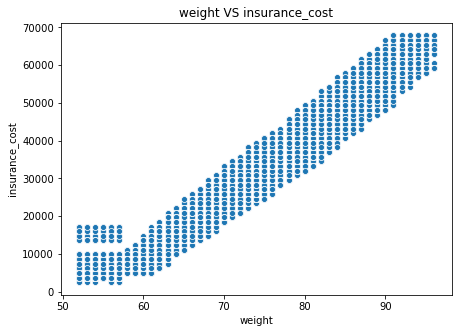

In [187]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='weight',y='insurance_cost',data=df,palette='Reds')
plt.title('weight VS insurance_cost')

Text(0.5, 1.0, 'weight_change_in_last_one_year VS insurance_cost')

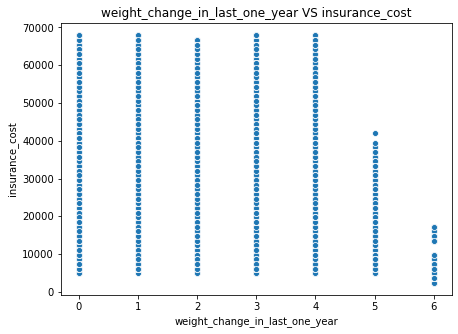

In [188]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='weight_change_in_last_one_year',y='insurance_cost',data=df,palette='Reds')
plt.title('weight_change_in_last_one_year VS insurance_cost')

In [189]:


df['age_group'] = pd.cut(x=df['age'], bins=[15, 24, 64, 99],
                     labels=['youth','Adult',
                             'Elderly'])

In [190]:
print(df['age_group'].value_counts())

Adult      17992
Elderly     3725
youth       3283
Name: age_group, dtype: int64


In [191]:
df.head(10)

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,age_group
0,3,1.0,1,Salried,2,125 to 150,4866.0,28,1,0,...,31.2,Unknown,67,N,Rare,Moderate,1,25,20978,Adult
1,0,0.0,0,Student,4,150 to 175,6411.0,50,0,0,...,34.2,formerly smoked,58,N,Rare,Moderate,3,27,6170,Adult
2,1,0.0,0,Business,4,200 to 225,4509.0,68,0,0,...,40.4,formerly smoked,73,N,Daily,Extreme,0,32,28382,Elderly
3,7,2.5,0,Business,2,175 to 200,6214.0,51,0,0,...,22.9,Unknown,71,Y,Rare,No,3,37,27148,Adult
4,3,1.0,0,Student,2,150 to 175,4938.0,44,0,1,...,26.5,never smoked,74,N,No,Extreme,0,34,29616,Adult
5,8,0.0,0,Salried,2,225 to 250,5306.0,39,0,0,...,38.0,Unknown,78,Y,Rare,No,3,13,39488,Adult
6,8,0.0,0,Student,4,125 to 150,4676.0,40,0,0,...,28.7,never smoked,81,N,No,Moderate,3,16,37020,Adult
7,1,0.0,0,Student,4,150 to 175,7448.0,46,0,0,...,26.0,smokes,72,N,Rare,Moderate,0,34,29616,Adult
8,8,1.0,0,Salried,4,125 to 150,5632.0,45,0,0,...,24.4,smokes,67,Y,Rare,No,1,12,22212,Adult
9,4,2.5,0,Salried,3,125 to 150,4130.0,38,0,0,...,46.0,formerly smoked,63,N,Daily,Moderate,0,12,8638,Adult


##### BIVARIATE ANALYSIS

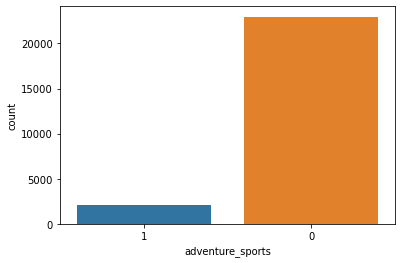

In [192]:
#Lets visualise catgorical data
sns.countplot(df['adventure_sports'], order = [1,0])


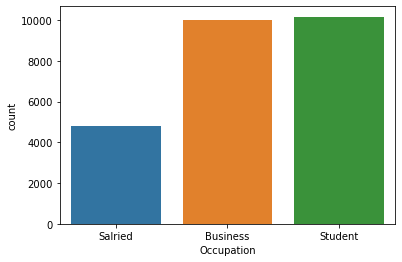

In [193]:
sns.countplot(df['Occupation'], order = ['Salried','Business','Student'])

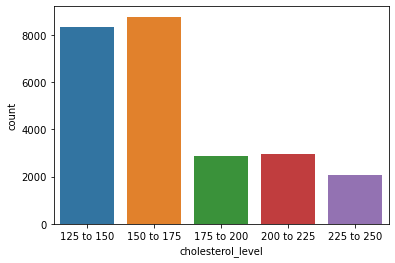

In [194]:
sns.countplot(df['cholesterol_level'], order = ['125 to 150','150 to 175','175 to 200','200 to 225','225 to 250'])

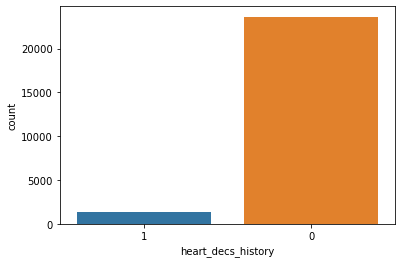

In [195]:
sns.countplot(df['heart_decs_history'], order = [1,0])

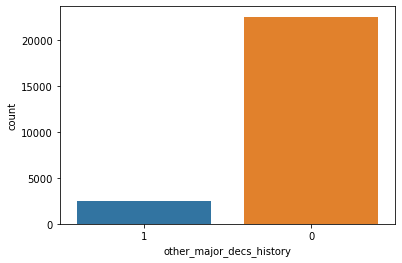

In [196]:
sns.countplot(df['other_major_decs_history'], order = [1,0])

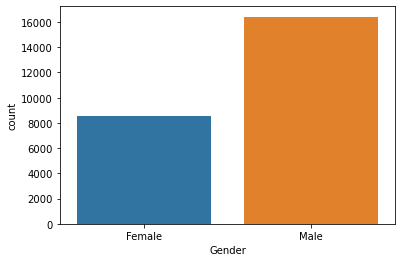

In [197]:
sns.countplot(df['Gender'], order = ['Female','Male'])

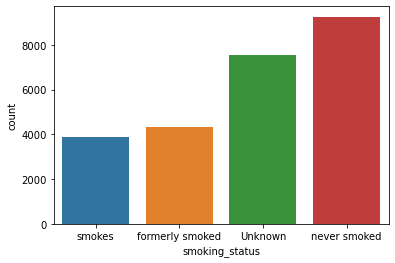

In [198]:
sns.countplot(df['smoking_status'], order = ['smokes','formerly smoked','Unknown','never smoked'])

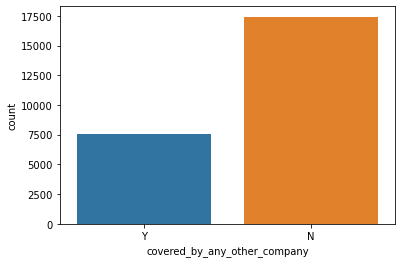

In [199]:
sns.countplot(df['covered_by_any_other_company'], order = ['Y','N'])

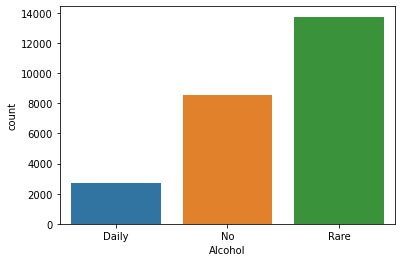

In [200]:
sns.countplot(df['Alcohol'], order = ['Daily','No','Rare'])

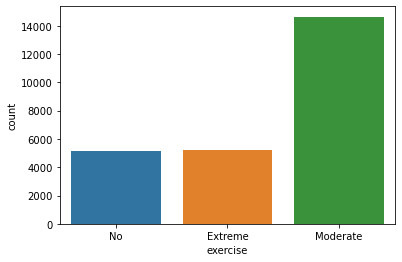

In [201]:
sns.countplot(df['exercise'], order = ['No','Extreme','Moderate'])

Text(0.5, 1.0, 'BMI of insuarance holders by age group, Divided by Gender')

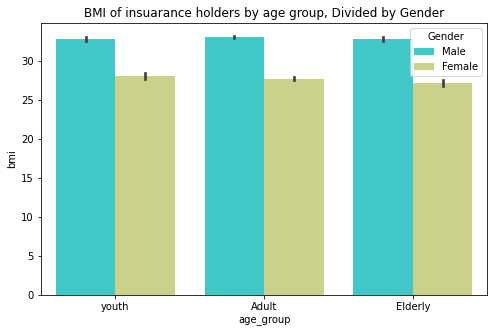

In [202]:
plt.figure(figsize=(8,5))
sns.barplot(x='age_group',y='bmi',data=df, palette='rainbow', hue="Gender")
plt.title("BMI of insuarance holders by age group, Divided by Gender")

Text(0.5, 1.0, 'daily_avg_steps of insuarance holders by age group, Divided by Gender')

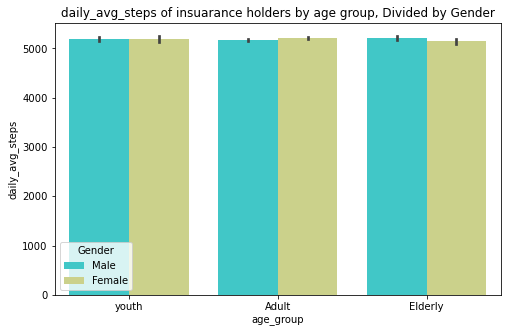

In [203]:
plt.figure(figsize=(8,5))
sns.barplot(x='age_group',y='daily_avg_steps',data=df, palette='rainbow', hue="Gender")
plt.title("daily_avg_steps of insuarance holders by age group, Divided by Gender")

Text(0.5, 1.0, 'avg_glucose_level of insuarance holders by age group, Divided by Gender')

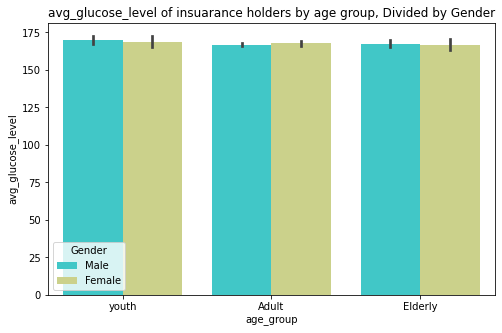

In [204]:
plt.figure(figsize=(8,5))
sns.barplot(x='age_group',y='avg_glucose_level',data=df, palette='rainbow', hue="Gender")
plt.title("avg_glucose_level of insuarance holders by age group, Divided by Gender")

Text(0.5, 1.0, 'weight of insuarance holders by age group, Divided by Gender')

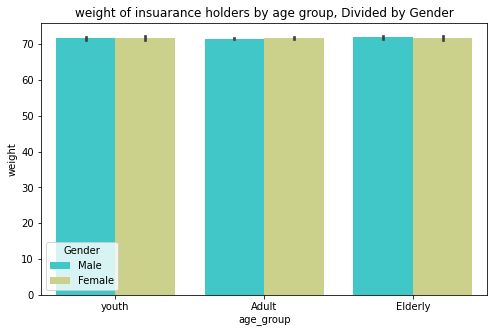

In [205]:
plt.figure(figsize=(8,5))
sns.barplot(x='age_group',y='weight',data=df, palette='rainbow', hue="Gender")
plt.title("weight of insuarance holders by age group, Divided by Gender")

Text(0.5, 1.0, 'fat_percentage of insuarance holders by age group, Divided by Gender')

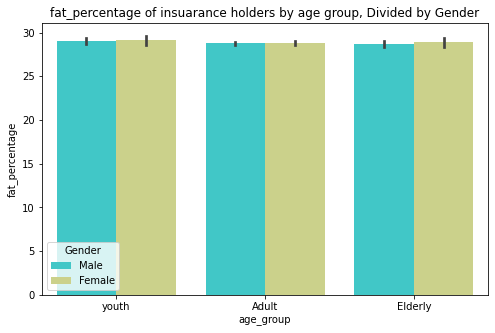

In [206]:
plt.figure(figsize=(8,5))
sns.barplot(x='age_group',y='fat_percentage',data=df, palette='rainbow', hue="Gender")
plt.title("fat_percentage of insuarance holders by age group, Divided by Gender")

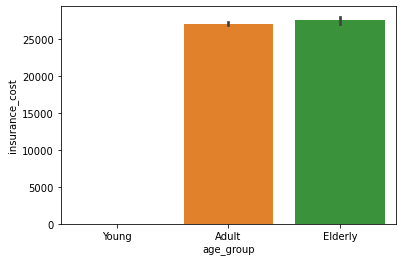

In [207]:
sns.barplot(data = df, x='age_group',y='insurance_cost',order = ['Young', 'Adult', 'Elderly'])

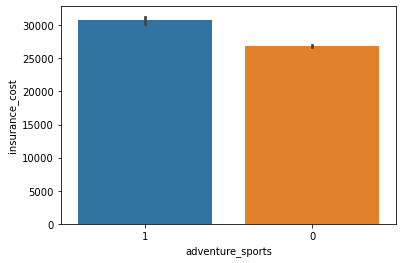

In [208]:
sns.barplot(data = df, x='adventure_sports',y='insurance_cost',order = [1,0])

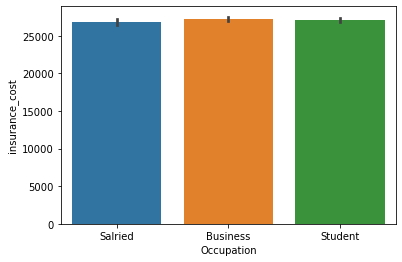

In [209]:
sns.barplot(data = df, x='Occupation',y='insurance_cost', order = ['Salried','Business','Student'])

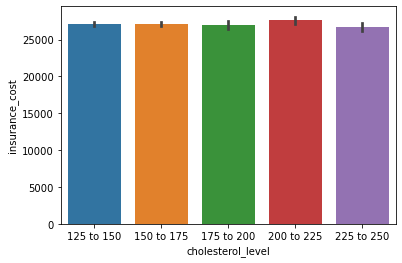

In [210]:
sns.barplot(data = df, x='cholesterol_level',y='insurance_cost', order = ['125 to 150','150 to 175','175 to 200','200 to 225','225 to 250'])

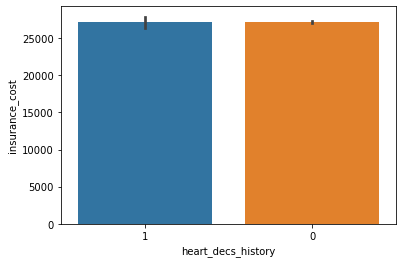

In [211]:
sns.barplot(data = df, x='heart_decs_history',y='insurance_cost', order = [1,0])

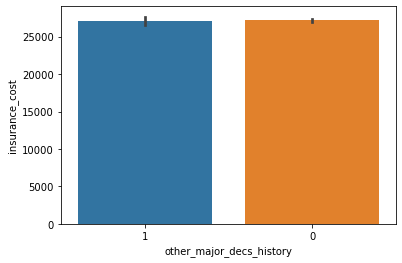

In [212]:
sns.barplot(data = df, x='other_major_decs_history',y='insurance_cost', order = [1,0])

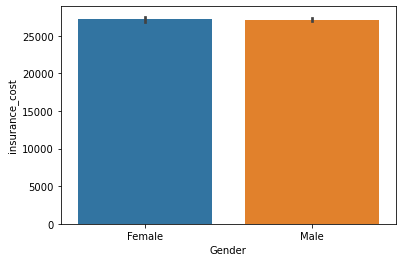

In [213]:
sns.barplot(data = df, x='Gender',y='insurance_cost', order = ['Female','Male'])

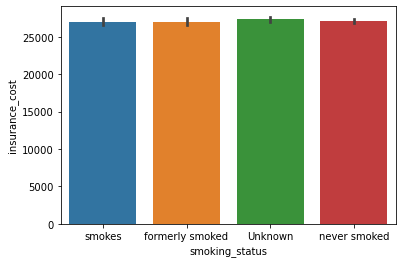

In [214]:
sns.barplot(data = df, x='smoking_status',y='insurance_cost', order = ['smokes','formerly smoked','Unknown','never smoked'])

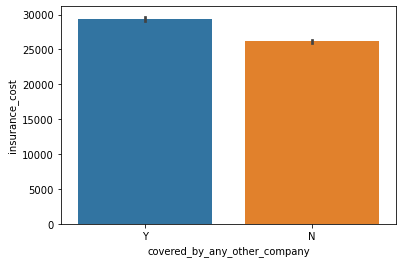

In [215]:
sns.barplot(data = df, x='covered_by_any_other_company',y='insurance_cost', order =['Y','N'])

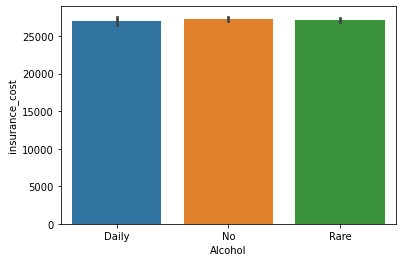

In [216]:
sns.barplot(data = df, x='Alcohol',y='insurance_cost', order =['Daily','No','Rare'])

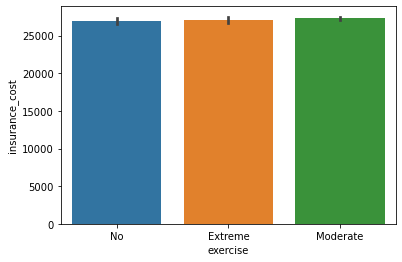

In [217]:
sns.barplot(data = df, x='exercise',y='insurance_cost', order =['No','Extreme','Moderate'])

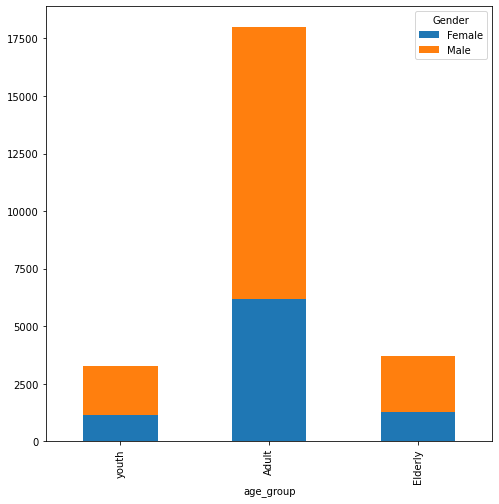

In [218]:
age_gender = pd.crosstab(index=df["age_group"], columns=df["Gender"])

age_gender.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

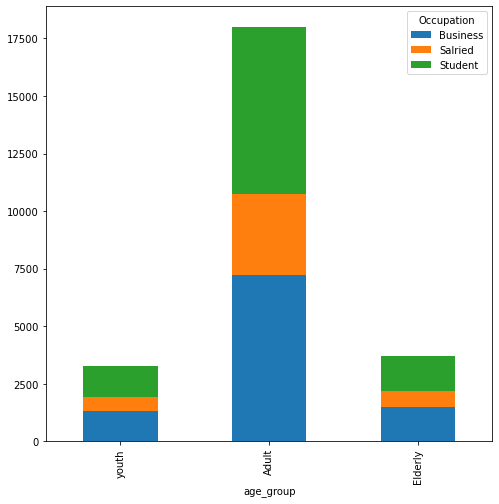

In [219]:
age_Occupation = pd.crosstab(index=df["age_group"], columns=df["Occupation"])

age_Occupation.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

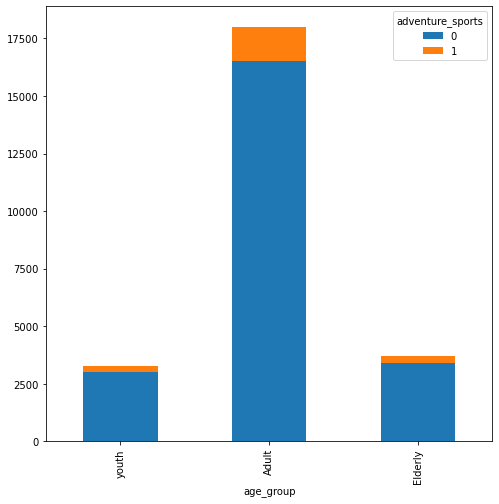

In [220]:
age_adventuresports = pd.crosstab(index=df["age_group"], columns=df["adventure_sports"])

age_adventuresports.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

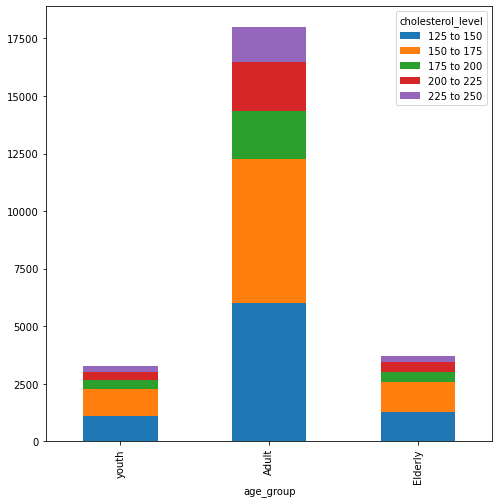

In [221]:
age_chollevel = pd.crosstab(index=df["age_group"], columns=df["cholesterol_level"])

age_chollevel.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

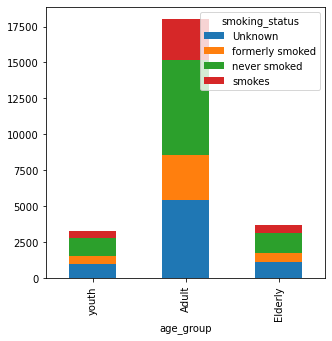

In [222]:
age_smokingsta = pd.crosstab(index=df["age_group"], columns=df["smoking_status"])

age_smokingsta.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

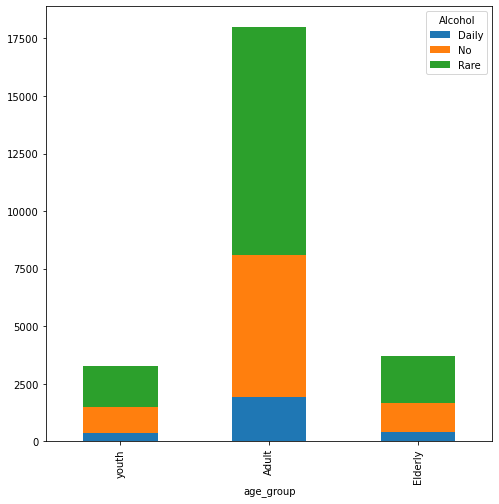

In [223]:
age_Alcohol = pd.crosstab(index=df["age_group"], columns=df["Alcohol"])

age_Alcohol.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

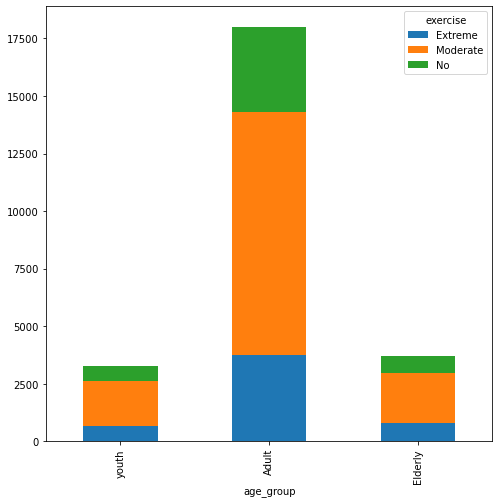

In [224]:
age_exercise = pd.crosstab(index=df["age_group"], columns=df["exercise"])

age_exercise.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

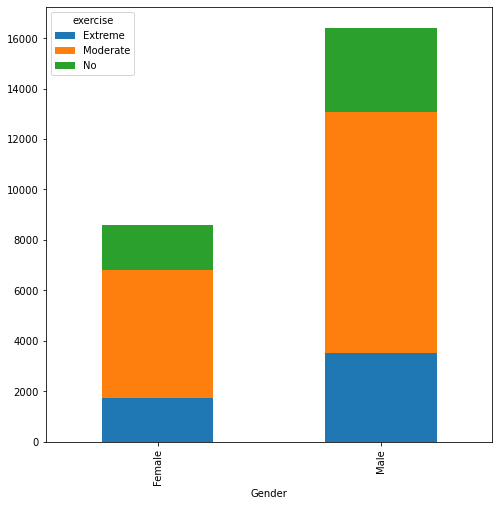

In [225]:
gender_exercise = pd.crosstab(index=df["Gender"], columns=df["exercise"])

gender_exercise.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

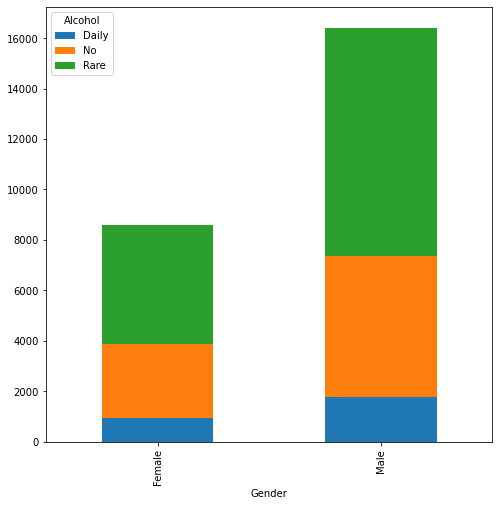

In [226]:
gender_Alcohol = pd.crosstab(index=df["Gender"], columns=df["Alcohol"])

gender_Alcohol.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

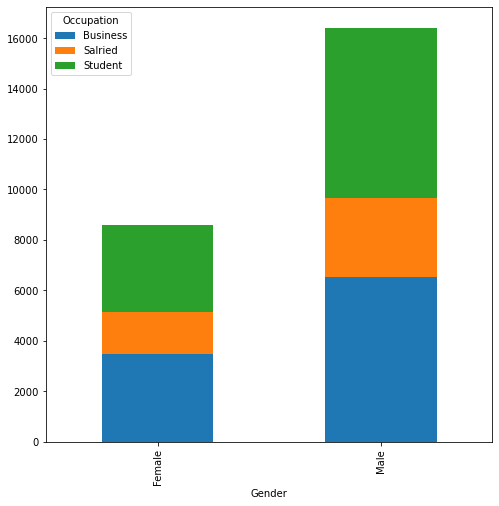

In [227]:
gender_Occupation = pd.crosstab(index=df["Gender"], columns=df["Occupation"])

gender_Occupation.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

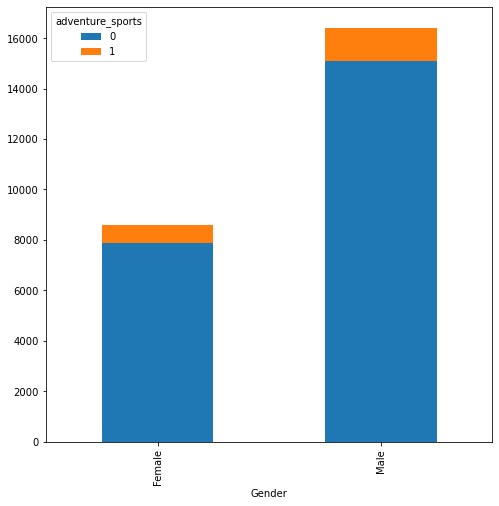

In [228]:
gender_adventure_sports = pd.crosstab(index=df["Gender"], columns=df["adventure_sports"])

gender_adventure_sports.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

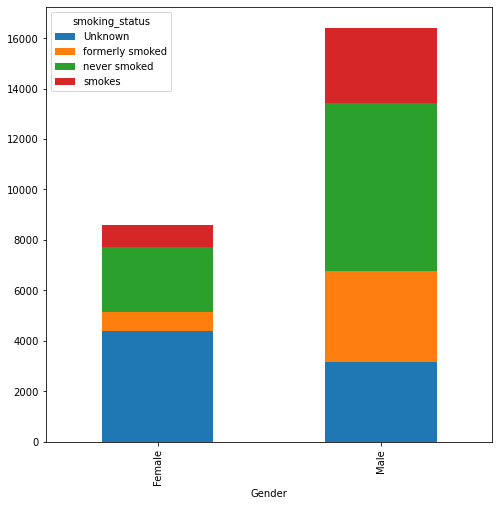

In [229]:
gender_smoking_status = pd.crosstab(index=df["Gender"], columns=df["smoking_status"])

gender_smoking_status.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

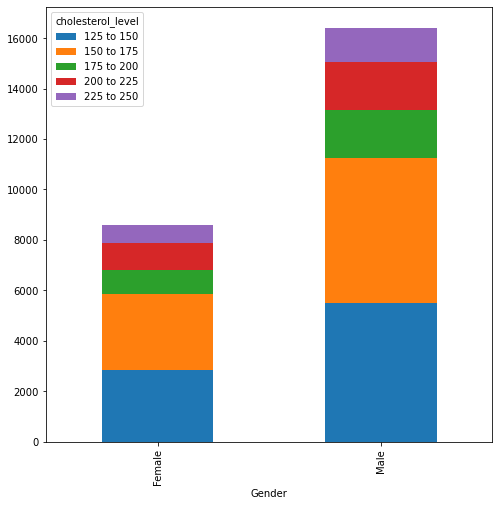

In [230]:
gender_cholesterol_level = pd.crosstab(index=df["Gender"], columns=df["cholesterol_level"])

gender_cholesterol_level.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

###### MULTIVARIATE ANALYSIS

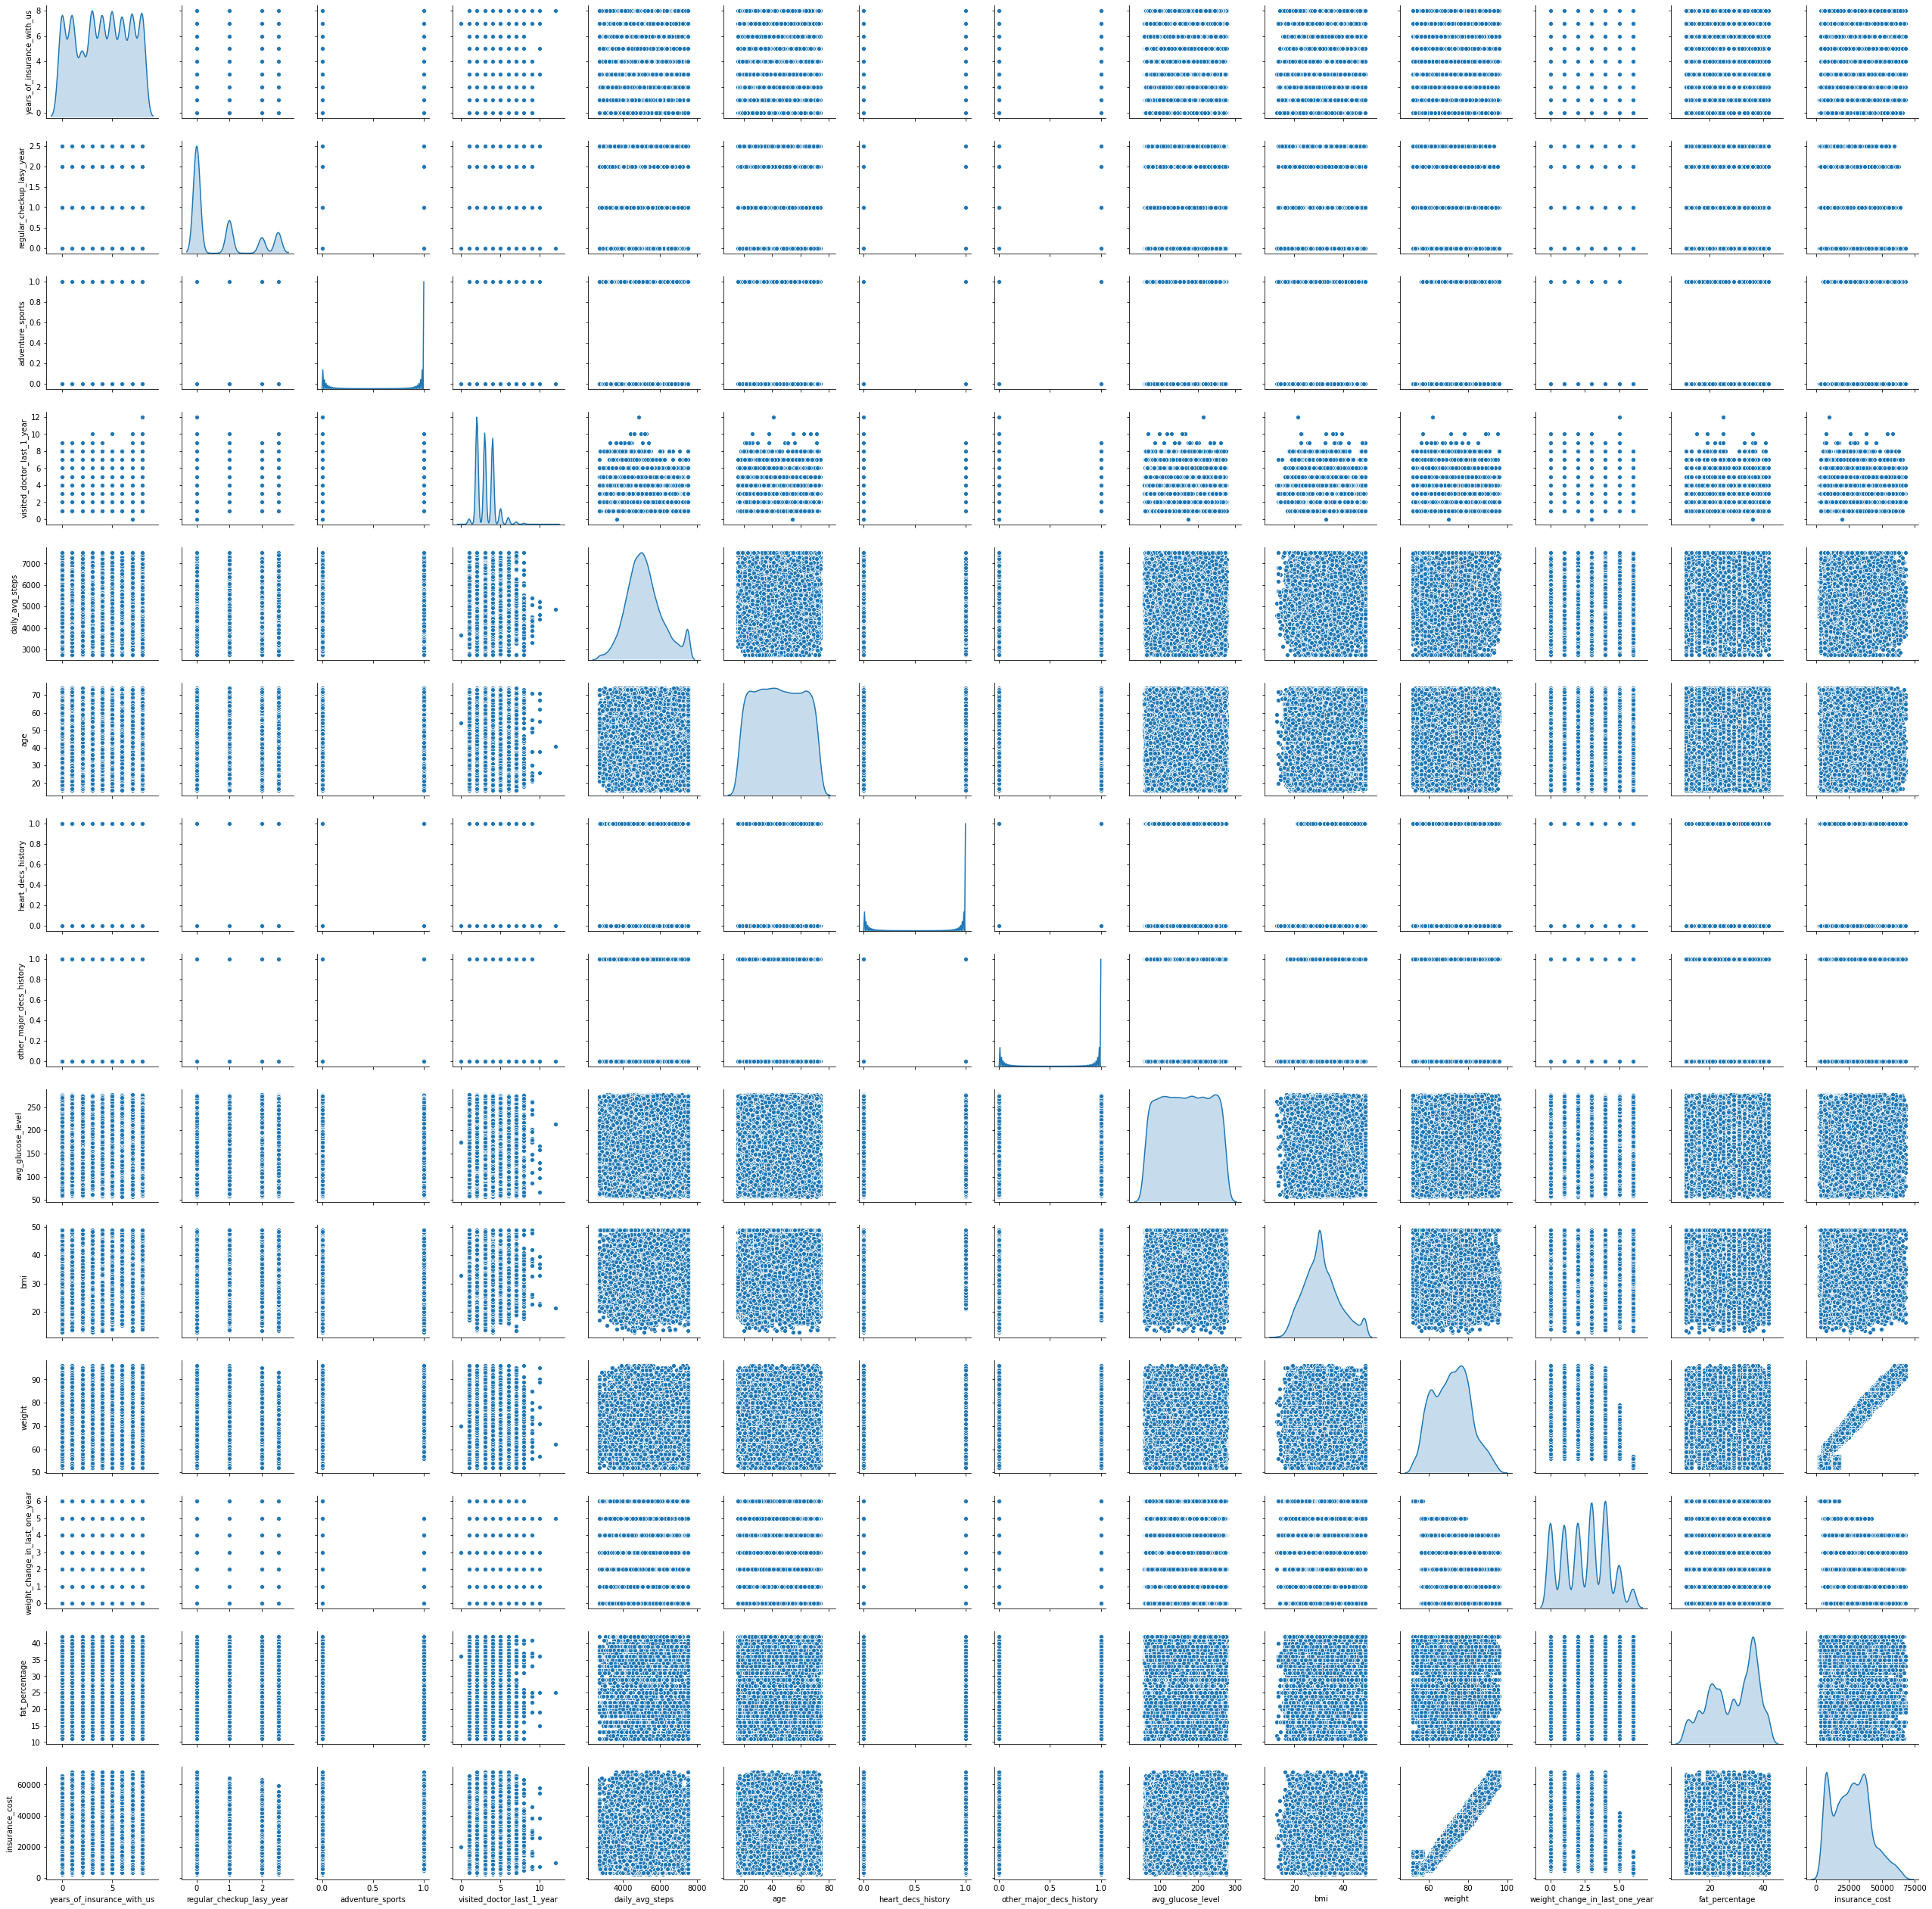

In [231]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

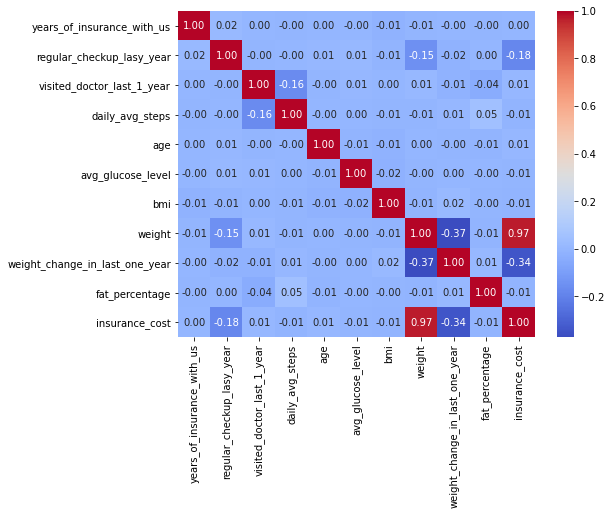

In [232]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

##### vARIABLE CODING


In [233]:
corelate = df.corr().abs() 
stack = corelate.unstack() 
sorting = stack.sort_values(ascending=False)
sorting=sorting[(sorting<1) & (sorting>0.3)].drop_duplicates().to_frame() 
sorting.columns = ['correlation']
sorting

,,correlation
insurance_cost,weight,0.970357
weight_change_in_last_one_year,weight,0.370670
insurance_cost,weight_change_in_last_one_year,0.342710


VARIABLE ENCODING

In [234]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [235]:
for feature in df.columns: 
    if df[feature].dtype == 'category':
        df[feature] = pd.Categorical(df[feature]).codes

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  float64
 2   adventure_sports                25000 non-null  int8   
 3   Occupation                      25000 non-null  int8   
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  int8   
 6   daily_avg_steps                 25000 non-null  float64
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int8   
 9   other_major_decs_history        25000 non-null  int8   
 10  Gender                          25000 non-null  int8   
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

In [237]:
# Copy all the predictor variables into X dataframe
X = df.drop('insurance_cost', axis=1)

# Copy target into the y dataframe. 
y = df[['insurance_cost']]

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [240]:
#Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (17500, 21)
X_test (7500, 21)
y_train (17500, 1)
y_test (7500, 1)


In [241]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [242]:
X.shape

(25000, 21)

In [243]:
y.shape

(25000, 1)

### Linear Regression-

In [244]:
# invoke the LinearRegression function and find the bestfit model on training data


Linearregression_model = LinearRegression()
Linearregression_model.fit(X_train, y_train)

LinearRegression()

In [245]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Linearregression_model.coef_[0][idx]))

The coefficient for years_of_insurance_with_us is -13.393487452772435
The coefficient for regular_checkup_lasy_year is -624.2772509820664
The coefficient for adventure_sports is 129.86549154409138
The coefficient for Occupation is 44.76096252030365
The coefficient for visited_doctor_last_1_year is -35.18716641927201
The coefficient for cholesterol_level is 39.59992963778481
The coefficient for daily_avg_steps is -0.029500264443245907
The coefficient for age is -1.2481182166553348
The coefficient for heart_decs_history is 95.32826701775872
The coefficient for other_major_decs_history is 65.25097732133932
The coefficient for Gender is 38.84196132876468
The coefficient for avg_glucose_level is 0.3586207378092543
The coefficient for bmi is -0.6575834782733294
The coefficient for smoking_status is -4.01838635550217
The coefficient for weight is 1489.1089108243764
The coefficient for covered_by_any_other_company is 1209.1636378498201
The coefficient for Alcohol is 5.656498696088941
The coeff

In [246]:
# Let us check the intercept for the model

intercept = Linearregression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -79810.39797063825


In [247]:
# R square on training data
Linearregression_model.score(X_train, y_train)

0.9447053314178462

In [248]:
# R square on testing data
Linearregression_model.score(X_test, y_test)

0.9449362616822526

In [249]:
#RMSE on Training data
predicted_train=Linearregression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

3378.9170619883917

In [250]:
#RMSE on Testing data
predicted_test=Linearregression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

3335.746359823853

In [251]:
###### Using Statsmodel library to get R type outputs 
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,age_group,insurance_cost
4289,0,2.0,0,2,4,1,5245.0,45,0,0,...,35.4,3,74,0,2,1,1,24,1,28382
19621,6,2.0,0,1,3,4,7510.5,60,0,0,...,31.1,0,67,1,2,1,3,40,1,23446
14965,6,0.0,0,0,4,1,5828.0,41,0,0,...,30.5,3,83,0,2,1,4,21,1,46892
12321,6,1.0,0,1,3,0,4463.0,55,0,0,...,32.7,1,84,0,1,1,4,12,1,40722
6269,4,2.5,1,0,3,1,7510.5,25,0,0,...,37.9,2,79,0,2,1,0,36,1,32084


In [252]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+Occupation+visited_doctor_last_1_year+cholesterol_level+daily_avg_steps+age+heart_decs_history+other_major_decs_history+bmi+smoking_status+covered_by_any_other_company+Alcohol+exercise+weight_change_in_last_one_year+fat_percentage', data = data_train).fit()
lm1.params

Intercept                         35960.150807
years_of_insurance_with_us         -136.048690
regular_checkup_lasy_year         -2879.949470
adventure_sports                   3102.300767
Occupation                          -64.342779
visited_doctor_last_1_year           95.551270
cholesterol_level                   -28.592798
daily_avg_steps                      -0.037915
age                                  -0.964136
heart_decs_history                  221.128682
other_major_decs_history             33.427487
bmi                                   3.990413
smoking_status                      -60.292395
covered_by_any_other_company       2877.031635
Alcohol                             103.714480
exercise                           -225.587115
weight_change_in_last_one_year    -2874.564490
fat_percentage                       -5.746658
dtype: float64

In [253]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     201.9
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:49:06   Log-Likelihood:            -1.9079e+05
No. Observations:               17500   AIC:                         3.816e+05
Df Residuals:                   17482   BIC:                         3.818e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [254]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((Linearregression_model.predict(X_test)-y_test)**2)

In [255]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual values.

import math

math.sqrt(mse)

3335.746359823854

In [256]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

Linearregression_model.score(X_test, y_test)

0.9449362616822526

In [257]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = Linearregression_model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted - Notscaled')

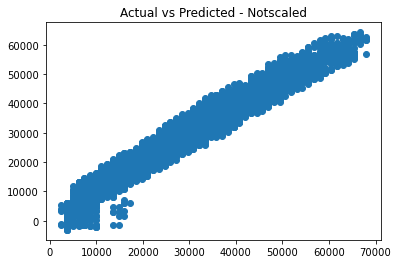

In [258]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['insurance_cost'], y_pred)
plt.title('Actual vs Predicted - Notscaled')

In [259]:
#ITERATION 2
# How do we improve the model? the R^2 is .921, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 

from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [260]:
#invoke the LinearRegression function and find the bestfit model on training data

Linearregression_model = LinearRegression()
Linearregression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [261]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Linearregression_model.coef_[0][idx]))

The coefficient for years_of_insurance_with_us is -0.0024299085713388904
The coefficient for regular_checkup_lasy_year is -0.03981573702745902
The coefficient for adventure_sports is 0.002469366904307662
The coefficient for Occupation is 0.002800188525640823
The coefficient for visited_doctor_last_1_year is -0.0027796536595197565
The coefficient for cholesterol_level is 0.0034711235096384317
The coefficient for daily_avg_steps is -0.001984846236783699
The coefficient for age is -0.0013991760401877195
The coefficient for heart_decs_history is 0.0014919328369526683
The coefficient for other_major_decs_history is 0.0013366694289673085
The coefficient for Gender is 0.0012828181795454848
The coefficient for avg_glucose_level is 0.0015657187146731143
The coefficient for bmi is -0.00032575286536155087
The coefficient for smoking_status is -0.0002995090657443387
The coefficient for weight is 0.9692636698697614
The coefficient for covered_by_any_other_company is 0.038776352036258156
The coeffic

In [262]:
intercept = Linearregression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5.944828137605343e-16


In [263]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

Linearregression_model.score(X_test_scaled, y_test_scaled)

0.9449532998861595

In [264]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((Linearregression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [265]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.23462033184240585

In [266]:
# predict price for a set of attributes not in the training or test set
y_pred = Linearregression_model.predict(X_test_scaled)

Text(0.5, 1.0, 'Actual vs Predicted - After_Scaled')

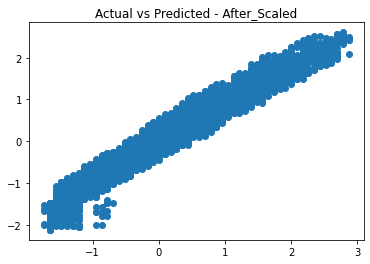

In [267]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['insurance_cost'], y_pred)
plt.title('Actual vs Predicted - After_Scaled')

### Checking for other models-

In [307]:
df=  pd.read_csv('C:\\Users\\amvi\\Downloads\\Health+Care+Project\\Data.csv')


In [308]:
df.head(5)

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [309]:
df.drop("applicant_id", axis=1, inplace=True)

In [310]:
df.drop("Location", axis=1, inplace=True)

In [311]:
# Check for missing value in any column
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [312]:
median=df["bmi"].median()
df["bmi"].replace(np.nan,median,inplace=True)

In [313]:
mean=df["Year_last_admitted"].mean()
df["Year_last_admitted"].replace(np.nan,mean,inplace=True)

In [314]:
#Year_last_admitted ould be dropped as it contains 40%  of missing value and keeping it in the dataset increases the noise.
df.drop("Year_last_admitted", axis=1, inplace=True)

In [315]:
#Converting all objects to categorical codes
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Occupation
[Salried, Student, Business]
Categories (3, object): [Business, Salried, Student]
[1 2 0]


feature: cholesterol_level
[125 to 150, 150 to 175, 200 to 225, 175 to 200, 225 to 250]
Categories (5, object): [125 to 150, 150 to 175, 175 to 200, 200 to 225, 225 to 250]
[0 1 3 2 4]


feature: Gender
[Male, Female]
Categories (2, object): [Female, Male]
[1 0]


feature: smoking_status
[Unknown, formerly smoked, never smoked, smokes]
Categories (4, object): [Unknown, formerly smoked, never smoked, smokes]
[0 1 2 3]


feature: covered_by_any_other_company
[N, Y]
Categories (2, object): [N, Y]
[0 1]


feature: Alcohol
[Rare, Daily, No]
Categories (3, object): [Daily, No, Rare]
[2 0 1]


feature: exercise
[Moderate, Extreme, No]
Categories (3, object): [Extreme, Moderate, No]
[1 0 2]


In [316]:
df.head(5)

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,avg_glucose_level,bmi,smoking_status,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,1,2,0,4866,28,1,0,...,97,31.2,0,67,0,2,1,1,25,20978
1,0,0,0,2,4,1,6411,50,0,0,...,212,34.2,1,58,0,2,1,3,27,6170
2,1,0,0,0,4,3,4509,68,0,0,...,166,40.4,1,73,0,0,0,0,32,28382
3,7,4,0,0,2,2,6214,51,0,0,...,109,22.9,0,71,1,2,2,3,37,27148
4,3,1,0,2,2,1,4938,44,0,1,...,118,26.5,2,74,0,1,0,0,34,29616


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  int8   
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  int8   
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  int8   
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

### We will split the data into test and train and build regression model of DT, Random Forest, Artificial Neural Network

In [318]:
#Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [319]:
#Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (17500, 21)
X_test (7500, 21)
y_train (17500, 1)
y_test (7500, 1)


In [320]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [321]:
annr = MLPRegressor(hidden_layer_sizes=(50),random_state=40, max_iter=200)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=40)
dtr = tree.DecisionTreeRegressor(random_state=40)
regression_model = LinearRegression()


models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]


for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
    else :
        i.fit(X_train_scaled,y_train)
        scores_train.append(i.score(X_train_scaled, y_train))
        scores_test.append(i.score(X_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test_scaled))))
        


In [322]:
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        3378.917062  3335.746360        0.944705    0.944936
Decision Tree Regressor     0.000000  4329.704905        1.000000    0.907232
Random Forest Regressor  1167.993129  3134.142080        0.993393    0.951391
ANN Regressor            7870.203370  7872.391472        0.700015    0.693315


##### Looks Like DT and RF are over-fitting, Let's Grid Search to get the best parametersYou can also visualise the tree and see where to prune it and decide the max_depth and other parameters



### Grid Search on Decision Tree

In [323]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 15}


### Using Grid Search for Random Forest

In [324]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [5, 10,20],
    'min_samples_split': [2,4,8],
    'n_estimators': [10,20,30]
}

rfr = RandomForestRegressor(random_state=40)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [325]:
grid_search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=40),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [326]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 20}


In [327]:
annr = MLPRegressor(hidden_layer_sizes=(50),random_state=40, max_iter=200)#you are free to tweak the layer sizes

rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf=10,
                            min_samples_split= 4, n_estimators= 20,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=30,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]


for i in models:
    if (i != annr):
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
    else :
        i.fit(X_train_scaled,y_train)
        scores_train.append(i.score(X_train_scaled, y_train))
        scores_test.append(i.score(X_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        3378.917062  3335.746360        0.944705    0.944936
Decision Tree Regressor  2876.723424  3180.641595        0.959920    0.949938
Random Forest Regressor  3186.000003  3399.249038        0.950839    0.942820
ANN Regressor            7870.203370  7872.391472        0.700015    0.693315
